IMDB_Movies Hypothesis Testing 

1. The stakeholder's first question is: does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

* They want you to perform a statistical test to get a mathematically-supported answer.

* They want you to report if you found a significant difference between ratings.

> . If so, what was the p-value of you analysis?

> . And which rating earns the most revenue?

In [1]:
# import libraires 
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.8.1'

In [2]:
# loaded the tmdb combined dataframe 
file = 'In_progress/DataClean/combined_tmdb_d.csv.gz'
df = pd.read_csv(file,lineterminator='\n')
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.4,21.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1868.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60125,tt9895024,0.0,/S1kutYyoyuBJKGS0mXxv2fZNbr.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,834443.0,de,Heikos Welt,...,0.0,118.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,Heiko's World,0.0,0.0,0.0,NaN
60126,tt9896876,0.0,/hMvRbT6HOqERhh3K8kXbaLz9LlZ.jpg,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,821493.0,en,India Sweets and Spices,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Let the aunties talk.,India Sweets and Spices,0.0,6.0,2.0,PG-13
60127,tt9898844,0.0,/q2KFBGyUSzHDhNqXEYv2LqTWVSz.jpg,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,870671.0,en,The Hunting,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Hunger runs deep.,The Hunting,0.0,4.9,20.0,NaN
60128,tt9900940,0.0,/3jjWLg5bevWqReyVroYqxwVrH0k.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,861294.0,en,The Scrapper,...,0.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,You can't escape your past.,The Scrapper,0.0,6.0,2.0,NaN


In [3]:
# dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   backdrop_path          36994 non-null  object 
 3   belongs_to_collection  3738 non-null   object 
 4   budget                 60130 non-null  float64
 5   genres                 60130 non-null  object 
 6   homepage               14776 non-null  object 
 7   id                     60130 non-null  float64
 8   original_language      60130 non-null  object 
 9   original_title         60130 non-null  object 
 10  overview               58761 non-null  object 
 11  popularity             60130 non-null  float64
 12  poster_path            54382 non-null  object 
 13  production_companies   60130 non-null  object 
 14  production_countries   60130 non-null  object 
 15  re

In [4]:
# Preprocessing
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','status','tagline','id','homepage',
                 'production_countries','video','production_companies','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df.head(3)

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN


In [5]:
df['release_date']

0        2000-09-22
1        2000-11-15
2        2000-04-14
3        2000-09-29
4        2000-09-02
            ...    
60125    2021-09-08
60126    2021-11-19
60127    2022-01-21
60128    2021-12-07
60129    2021-07-28
Name: release_date, Length: 60130, dtype: object

In [6]:
# saving the release_date into three independent column
df[['release_yr','release_month', 'release_day']]= df['release_date'].str.split('-',expand=True)

,release_yr,release_month,release_day
0,2000,09,22
1,2000,11,15
2,2000,04,14
3,2000,09,29
4,2000,09,02
...,...,...,...
60125,2021,09,08
60126,2021,11,19
60127,2022,01,21
60128,2021,12,07


In [7]:
df.drop(columns=['release_date'])
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,release_yr,release_month,release_day
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",2.491,2000-09-22,0.0,86.0,The Fantasticks,5.4,21.0,NaN,2000,09,22
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",1.974,2000-11-15,0.0,100.0,For the Cause,4.4,7.0,NaN,2000,11,15
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.341,2000-04-14,0.0,152.0,Gang,0.0,0.0,NaN,2000,04,14
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",22.411,2000-09-29,12854953.0,99.0,In the Mood for Love,8.1,1868.0,PG,2000,09,29
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",4.889,2000-09-02,0.0,99.0,Chinese Coffee,6.9,46.0,R,2000,09,02


**1. State the Hypothesis & Null Hypothesis**

- $H_0$ (Null Hypothesis): Yes, Movies over 2.5 hours long earn more revenue than movies that are 1.5 hours long(or less). 
- $H_A$ (Alternative Hypothesis): No, Movies over 2.5 hours long earn more revenue than movies that are 1.5 hours long(or less).

**2. Determine the correct test to perform.**
- Type of Data?
    - Numeric
- How many groups/samples? 
    - 2 groups
- Therefore, which test is appropriate?
    - 2-Sample Test

**Visualize and separate data for hypothesis**

   - What column is our target?
   - What column determines our groups?


In [8]:
# check for col 'runtime'
df['runtime']

0         86.0
1        100.0
2        152.0
3         99.0
4         99.0
         ...  
60125    118.0
60126    101.0
60127     91.0
60128     87.0
60129    111.0
Name: runtime, Length: 60130, dtype: float64

In [9]:
df['revenue'].value_counts()

0.0           52693
10000.0          30
2000000.0        18
100000.0         17
1000000.0        16
              ...  
2336172.0         1
29506464.0        1
2260712.0         1
31244858.0        1
4588389.0         1
Name: revenue, Length: 6931, dtype: int64

In [10]:
# checking for movies 2.5 hours or more
df['two_hr'] = df['runtime'] >= 180.0
df['two_hr'].value_counts(normalize=True)

False    0.996691
True     0.003309
Name: two_hr, dtype: float64

In [11]:
# checking for movies 1.5 hours 
df['one_hr'] = df['runtime'] >= 90.0
df['one_hr'].value_counts(normalize=True)

True     0.629669
False    0.370331
Name: one_hr, dtype: float64

In [12]:
# saving list needed for each group 
need_col = ['two_hr', 'one_hr', 'revenue']

In [13]:
# save movies around 1.5 hrs
one_hr = df.loc[df['two_hr']==False, need_col]
one_hr

,two_hr,one_hr,revenue
0,False,False,0.0
1,False,True,0.0
2,False,True,0.0
3,False,True,12854953.0
4,False,True,0.0
...,...,...,...
60125,False,True,0.0
60126,False,True,0.0
60127,False,True,0.0
60128,False,False,0.0


In [14]:
# save movies over than 2.5 hrs
two_hr= df.loc[df['two_hr']==True, need_col]
two_hr

,two_hr,one_hr,revenue
474,True,True,0.0
505,True,True,0.0
584,True,True,4900000.0
725,True,True,0.0
762,True,True,0.0
...,...,...,...
58684,True,True,0.0
59303,True,True,0.0
59397,True,True,0.0
59459,True,True,0.0


In [15]:
# making a df to visualize each group 
visual_df = pd.concat([one_hr, two_hr])
visual_df

,two_hr,one_hr,revenue
0,False,False,0.0
1,False,True,0.0
2,False,True,0.0
3,False,True,12854953.0
4,False,True,0.0
...,...,...,...
58684,True,True,0.0
59303,True,True,0.0
59397,True,True,0.0
59459,True,True,0.0


<AxesSubplot:xlabel='two_hr', ylabel='revenue'>

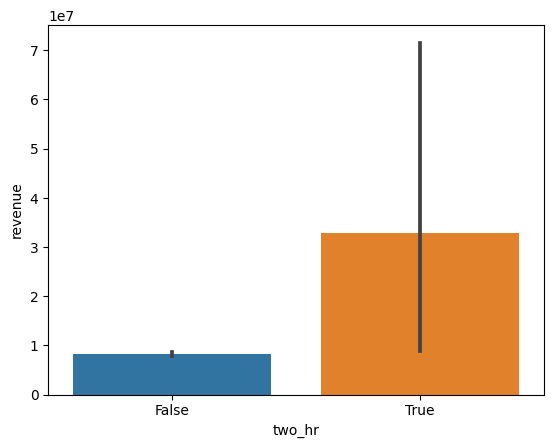

In [16]:
## visualize the group means
sns.barplot(data=visual_df, x='two_hr', y='revenue')

<AxesSubplot:xlabel='one_hr', ylabel='revenue'>

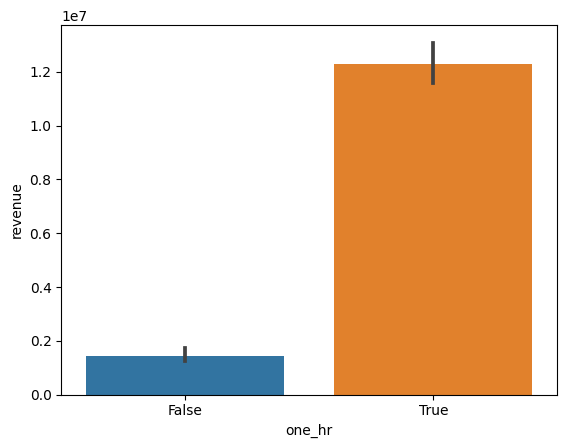

In [17]:
## visualize the group means
sns.barplot(data=visual_df, x='one_hr', y='revenue')

**Checking Assumption of No Significant Outliers**

In [18]:
## Saving Just the numeric col as final group variables 
one_hr_group = one_hr['revenue']
two_hr_group = two_hr['revenue']
one_hr_group

0               0.0
1               0.0
2               0.0
3        12854953.0
4               0.0
            ...    
60125           0.0
60126           0.0
60127           0.0
60128           0.0
60129     4588389.0
Name: revenue, Length: 59931, dtype: float64

In [19]:
# check for movies less than 2.5 hrs group for outliers
one_hr_grp_outliers = np.abs(stats.zscore(one_hr_group)) > 1

# how many outliers 
one_hr_grp_outliers.sum()

1656

In [20]:
# check length of group 
len(one_hr_group)

59931

In [21]:
# remove outliers from two_less_grp
one_hr_clean = one_hr_group[one_hr_grp_outliers==False]
one_hr_clean

0               0.0
1               0.0
2               0.0
3        12854953.0
4               0.0
            ...    
60125           0.0
60126           0.0
60127           0.0
60128           0.0
60129     4588389.0
Name: revenue, Length: 58275, dtype: float64

In [22]:
# check for movies 2.5 hrs or more group for outliers
two_hr_grp_outliers = np.abs(stats.zscore(two_hr_group)) > 1

# how many outliers 
two_hr_grp_outliers.sum()

6

In [23]:
# check length of group 
len(two_hr_group)

199

In [24]:
# remove outliers from two_more_grp
two_hr_clean = two_hr_group[two_hr_grp_outliers==False]
two_hr_clean

474            0.0
505            0.0
584      4900000.0
725            0.0
762            0.0
           ...    
58684          0.0
59303          0.0
59397          0.0
59459          0.0
59796          0.0
Name: revenue, Length: 193, dtype: float64

**Test for Normality**

In [25]:
# checking two_less_clean group for normality
norm_results = stats.normaltest(two_hr_clean)
print(norm_results)

# Is the p-values less than 0.05?
norm_results.pvalue < .05

NormaltestResult(statistic=339.8810524864669, pvalue=1.569521252784285e-74)


True

In [26]:
# check n for two_less clean group
len(two_hr_clean)

193

In [27]:
# checking two_more_clean group for normality
norm_rst = stats.normaltest(one_hr_clean)
print(norm_rst)

# Is the p-values less than 0.05?
norm_rst.pvalue < .05

NormaltestResult(statistic=71121.69450658545, pvalue=0.0)


True

In [28]:
# check n for two_more clean group
len(one_hr_clean)

58275

- The test for normality shows that the data is not normal. 
 - The pvalue is less than 0.05

**Test for Equal Variances**

In [29]:
# testing for variance with (Levene's test)
result = stats.levene(two_hr_clean, one_hr_clean)
result

LeveneResult(statistic=14.207022453755371, pvalue=0.00016391907854763292)

In [30]:
## Use an if-else to help intepret the pvalue

result.pvalue < .05

True

**Final Hypothesis Test**

In [31]:
## run final hypothess test
final_result =stats.ttest_ind(one_hr_clean, two_hr_clean, equal_var=False)
final_result


Ttest_indResult(statistic=-1.813513467470691, pvalue=0.07131172968997315)

In [32]:

final_result.pvalue <.00000001

False